https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [1]:
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves    
)


%matplotlib inline

In [2]:
# From kaggle dataset
#df= pd.read_csv('/kaggle/input/diabetes-binary-health-indicators-brfss2015/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df= pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.duplicated().any()

True

In [10]:
df.duplicated().sum()

24206

In [11]:
df.T.duplicated().any()

False

In [12]:
df.T.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(229474, 22)

In [15]:
df.duplicated().sum()

0

# DATA VISUALIZATION

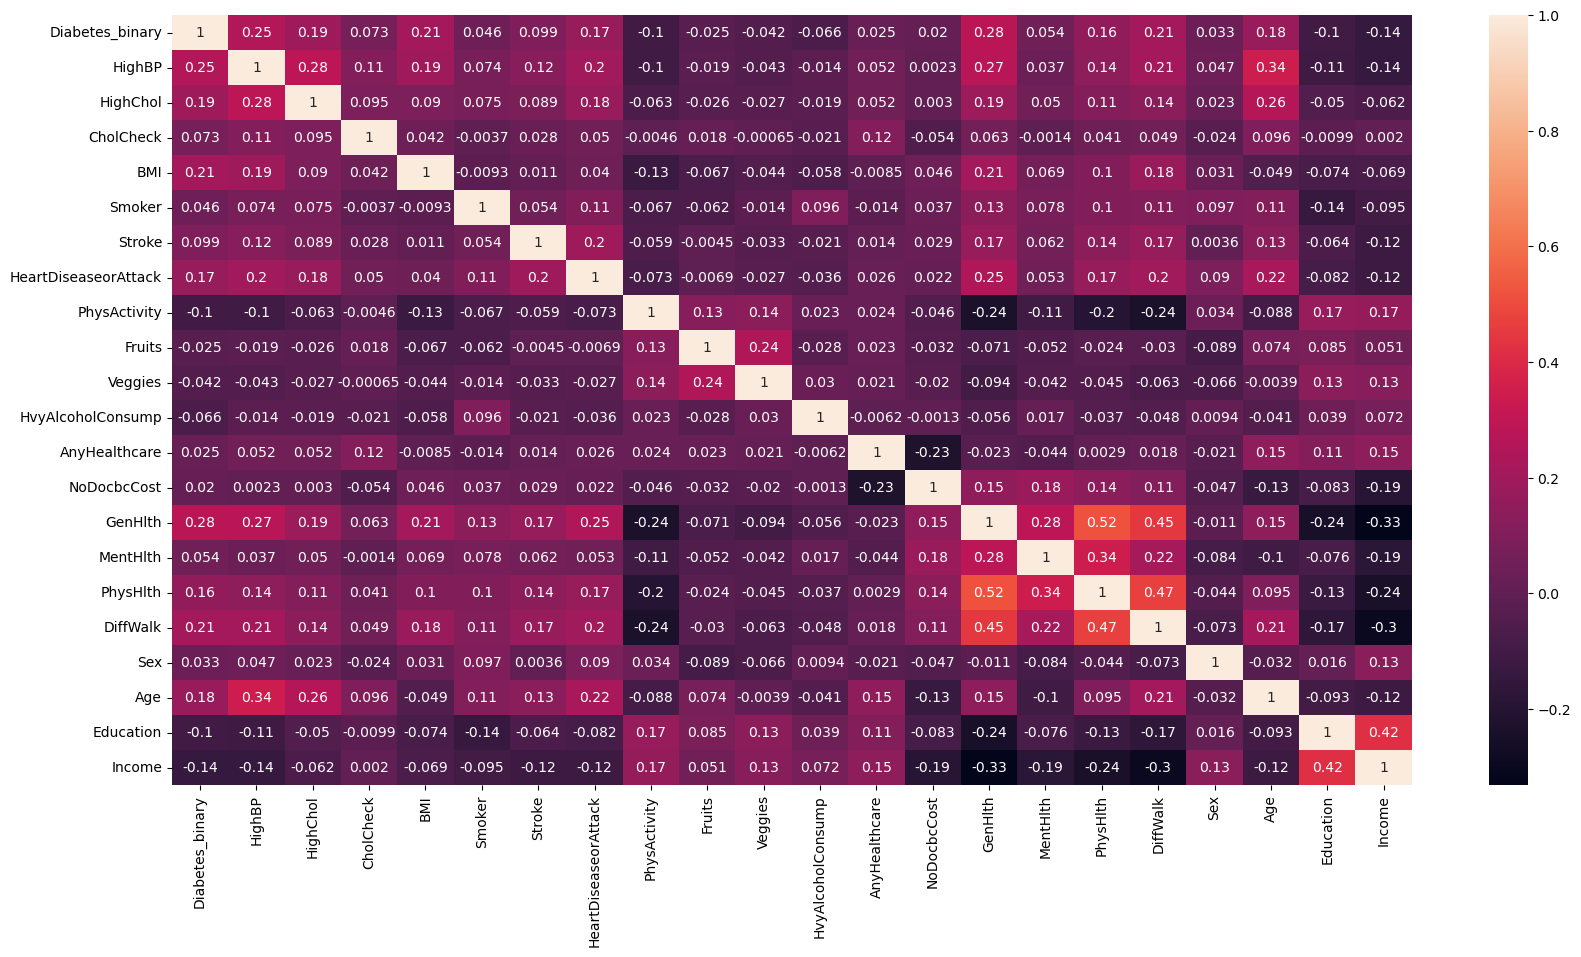

In [16]:
## 
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()



### Key Observations:
1. **Diabetes_binary and HighBP (Hypertension) (~0.25 correlation)**  
   - A moderate positive correlation suggests that people with high blood pressure have a higher likelihood of diabetes.
  
2. **Diabetes_binary and General Health (~0.28 correlation)**  
   - Poor general health is moderately associated with diabetes.
  
3. **HighBP and Age (~0.34 correlation)**  
   - As expected, older individuals tend to have higher blood pressure.
  
4. **HighBP and General Health (~0.27 correlation)**  
   - Poor general health is linked with higher blood pressure.
  
5. **General Health and Mental/Physical Health (~0.52, ~0.47 correlation respectively)**  
   - People reporting poor general health also report worse mental and physical health.
  
6. **Education and Income (~0.42 correlation)**  
   - Higher education is associated with higher income.

7. **Physical Activity and General Health (-0.24 correlation)**  
   - More physical activity is linked to better general health.

8. **Heavy Alcohol Consumption has weak correlations with most variables**  
   - This suggests it does not significantly impact most other health-related factors in this dataset.

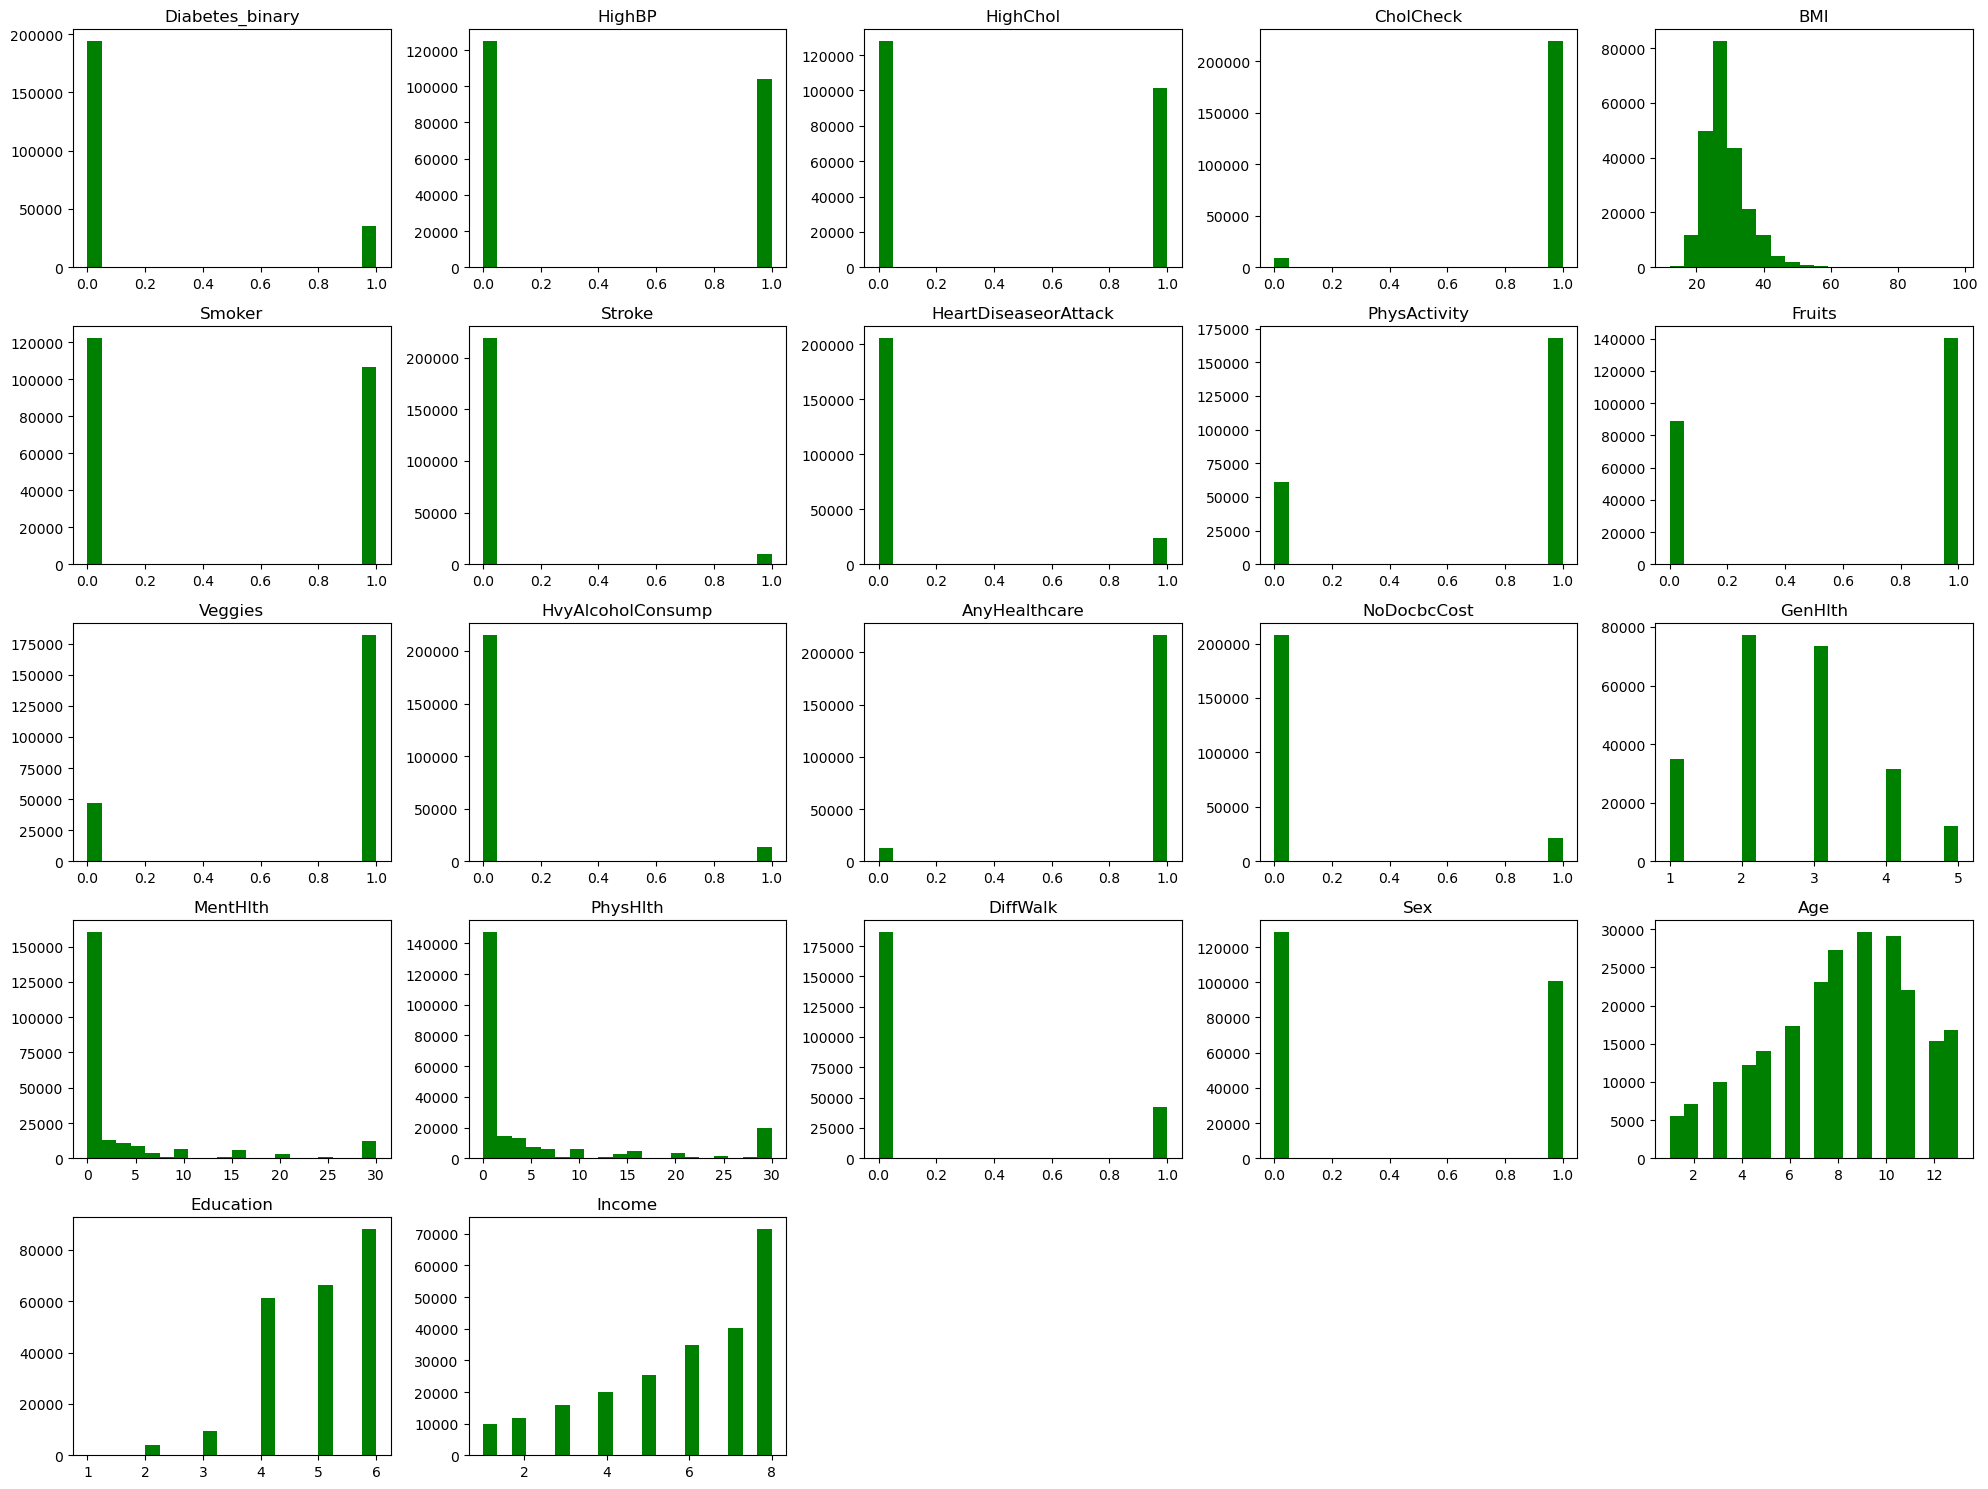

In [24]:
df.hist(figsize=(20, 15), bins=20, color='green', layout=(5, 5), grid=False)
plt.tight_layout()
plt.show()

In [7]:
## Checking for multicolinearity
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(df,0.85)
corr_features

set()

In [8]:
# Removing highly correlated features if any exists
df = df.drop(columns=corr_features)

In [9]:
df.shape

(253680, 22)

In [10]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separating features (X) and target (y) for training
X_train = train_df.drop(columns='Diabetes_binary')
y_train = train_df['Diabetes_binary']

# Separating features (X) and target (y) for testing
X_test = test_df.drop(columns='Diabetes_binary')
y_test = test_df['Diabetes_binary']

In [11]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31141,0.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
98230,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0
89662,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,12.0,5.0,6.0
208255,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
233415,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,4.0,6.0


In [12]:
X_train.shape, X_test.shape

((202944, 21), (50736, 21))

In [13]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance

feature_names = X_train.columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transforming X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transforming X_test
X_test_scaled = scaler.transform(X_test)

# Converting the scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)


In [14]:
# Handling Imbalanced Data

train_df.Diabetes_binary.value_counts()

0.0    174595
1.0     28349
Name: Diabetes_binary, dtype: int64

In [15]:
# Balancing the Training set with SMOTE
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 174595, 1.0: 28349})
Class distribution after SMOTE: Counter({0.0: 174595, 1.0: 174595})


In [16]:
X_train, y_train = X_train_balanced, y_train_balanced

In [17]:
from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    total = cm.sum()
    percentages = cm / total * 100
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create and plot ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", ax=ax)
    
    # Set title
    plt.title(f"Confusion Matrix: {model_name}")
    
    # Get the axes and image for color determination
    im = disp.im_
    
    # Define labels
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    
    # Determine text color based on cell darkness
    colors = [["white" if im.norm(value) > 0.5 else "black" for value in row] 
              for row in cm]
    
    # Add annotations with counts, labels, and percentages
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, 
                         f'{cm[i, j]}\n{labels[i][j]}\n{percentages[i, j]:.1f}%',
                         ha="center", va="center",
                         color=colors[i][j])
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics for additional use if needed
    metrics = {
        'confusion_matrix': cm,
        'percentages': percentages
    }
    return metrics

In [20]:


def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    percent = cm / cm.sum() * 100
    
    annotations = np.array([[f"{label}\n{val}\n({p:.1f}%)" 
                            for label, val, p in zip(row, vals, prow)] 
                          for row, vals, prow in zip(labels, cm, percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Precision: 0.31
Recall: 0.78
Accuracy: 0.73
F1 Score: 0.44

[[31665 12074]
 [ 1571  5426]]


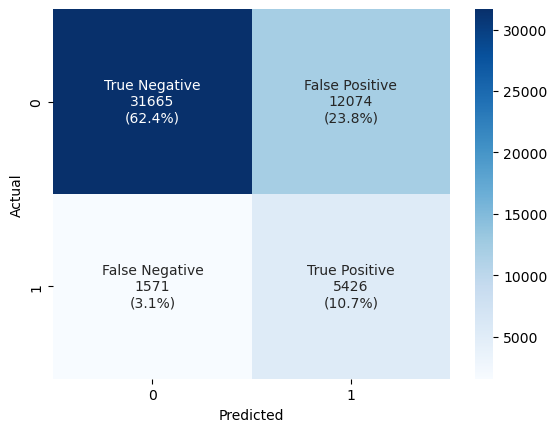

In [27]:
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print()
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.svm import SVC  # Importing Support Vector Classifier for modeling

svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test, svm_ypred))
print(confusion_matrix(y_test, svm_ypred))
print(classification_report(y_test, svm_ypred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_ypred = decision_tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test, dt_ypred))
print(confusion_matrix(y_test, dt_ypred))
print(classification_report(y_test, dt_ypred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_ypred = random_forest.predict(X_test)

In [ ]:
print(accuracy_score(y_test, rf_ypred))
print(confusion_matrix(y_test, rf_ypred))
print(classification_report(y_test, rf_ypred))

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train)
xgb_ypred = xgboost.predict(X_test)

In [ ]:
print(accuracy_score(y_test, xgb_ypred))
print(confusion_matrix(y_test, xgb_ypred))
print(classification_report(y_test, xgb_ypred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gradient_boost = GradientBoostingClassifier(random_state=42)
gradient_boost.fit(X_train, y_train)
gb_ypred = gradient_boost.predict(X_test)

In [ ]:
print(accuracy_score(y_test, gb_ypred))
print(confusion_matrix(y_test, gb_ypred))
print(classification_report(y_test, gb_ypred))